<center><b><font size=6>Lab-4 Data Visualization<b><center>

### 2. Exercise
- Focus on solving the problem and for now, you don't need to care too much about the details and whether it's appealing or not. In a lot of the following problems, the key point is how to derive the data that you want to plot, requiring the skills you have obtained from previous courses about Python, pandas, numpy, etc.
- The general logic behind making plots is always the same, but you need to learn how to use documentation and online resource to make new or customized plots that you have never seen before.
- Refer to documentation, Google, stackoverflow, chatGPT, etc, and at last, ask me, but I may not be able to give you the answer if all of the previous have failed you.
- Another important step is to compare your answers and the results that I will be providing after the class, so that you will know what you lack, what you can improve, and maybe yours is even better!
- The dataset we will be using is called **Darknet** dataset. Darknets are sensors that observe traffic received by networks that are announced on the Internet but hosting neither production services nor client host. The unsolicited packets received by darknet sensors represent a privileged source of information for network security and debugging activities, exposing threats like scans, brute-force attempts, and misconfigured hosts. The traffic of hundreds of sources target all TCP/UDP ports. The dataset we are using contain the traffic (record of packets) that received by darknet sensors allocated in Polito. You can load the data from ``darknet_traces.csv``, in which there are 8 columns:
    - **ts**: timestamp of the received packet when it is captured by darknet. It's in the format of Unix time, which measures time by the number of seconds that have elapsed since 00:00:00 UTC on 1 January 1970, therefore, you can convert it to human-readable date and time.
    - **src_ip**: IP address of senders (sources) that sent the packet
    - **src_port**: source port from which the packet has been sent
    - **dst_ip**: darknet IP address (destination) reached by the packet
    - **dst_port**: darknet port reached by the packet
    - **proto**: used protocol
    - **pck_len**: length of the packet in bytes
    - **ttl**: time to live of a packet, which represents the limited lifetime of a packet in the network, and is a counter that reduces by 1 every time the packet reaches a router, meaning that the packet will be discarded when it reaches 0. Under the Internet Protocol, TTL is an 8-bit field so the maximum is 255.

<center><img src="darknet.png" alt="drawing" width="1000"/></center>

In [78]:
# read csv file
df_dark = pd.read_csv('darknet_traces.csv')
df_dark

,ts,src_ip,src_port,dst_ip,dst_port,proto,pck_len,ttl
0,1.619827e+09,92.63.196.13,57340,130.192.166.135,11676,tcp,60,243
1,1.619827e+09,172.245.79.122,57026,130.192.166.46,23,tcp,60,235
2,1.619827e+09,1.85.44.226,38567,130.192.166.84,1433,tcp,60,225
3,1.619827e+09,163.172.106.63,47018,130.192.166.197,15467,tcp,60,243
4,1.619827e+09,163.172.106.63,47018,130.192.166.104,15467,tcp,60,243
...,...,...,...,...,...,...,...,...
499995,1.619854e+09,45.144.214.11,50689,130.192.166.10,3040,tcp,60,244
499996,1.619854e+09,167.248.133.69,7831,130.192.166.158,2002,tcp,60,32
499997,1.619854e+09,92.63.196.13,57340,130.192.166.30,14528,tcp,60,243
499998,1.619854e+09,80.82.70.118,60000,130.192.166.247,1701,tcp,60,247


##### 2.1 Plot the number of received packets per minute
1. Line plot: from the beginning to the end, for each minute following the chronological order, count the number of received packets within the corresponding minute. Afterwards, making a time series plot - the number of packets with respect to the timestamp. Try to change the time aggregation (e.g., 30s) to see the change.
    1. Convert the column of timestamp to nanosecond by multiplying $10^9$.
    2. Change the data type of timestamp from float to datetime by using `pd.to_datetime()`.
    3. Set the timestamp column as index.
    4. Use `.resample()` (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html?highlight=resample#pandas.DataFrame.resample">documentation</a>) to aggregate samples into the corresponding minute, and then count the samples in each minute (the logic is similar to `.groupby()`).
3. Distribution plot: visualize the distribution of number of packets per minute, using **histogram with KDE**.
4. Answering the following questions:
    - Can you observe some trends or abnormal behaviors in the plots? 
    - In which plot can you observe the most frequent number of packets, what are these numbers?
    - Describe the difference when you modify the time aggregation. What remains similar?

In [79]:
df_dark['ts'] = df_dark['ts'] * 1e9

In [80]:
df_dark['ts'] = pd.to_datetime(df_dark['ts'])

In [81]:
df_dark.set_index('ts', inplace = True)
df_dark

,src_ip,src_port,dst_ip,dst_port,proto,pck_len,ttl
ts,,,,,,,
2021-05-01 00:00:00.160742144,92.63.196.13,57340,130.192.166.135,11676,tcp,60,243
2021-05-01 00:00:00.204737792,172.245.79.122,57026,130.192.166.46,23,tcp,60,235
2021-05-01 00:00:00.312591104,1.85.44.226,38567,130.192.166.84,1433,tcp,60,225
2021-05-01 00:00:00.337841920,163.172.106.63,47018,130.192.166.197,15467,tcp,60,243
2021-05-01 00:00:00.337998080,163.172.106.63,47018,130.192.166.104,15467,tcp,60,243
...,...,...,...,...,...,...,...
2021-05-01 07:20:12.532497152,45.144.214.11,50689,130.192.166.10,3040,tcp,60,244
2021-05-01 07:20:12.602774016,167.248.133.69,7831,130.192.166.158,2002,tcp,60,32
2021-05-01 07:20:12.744925952,92.63.196.13,57340,130.192.166.30,14528,tcp,60,243


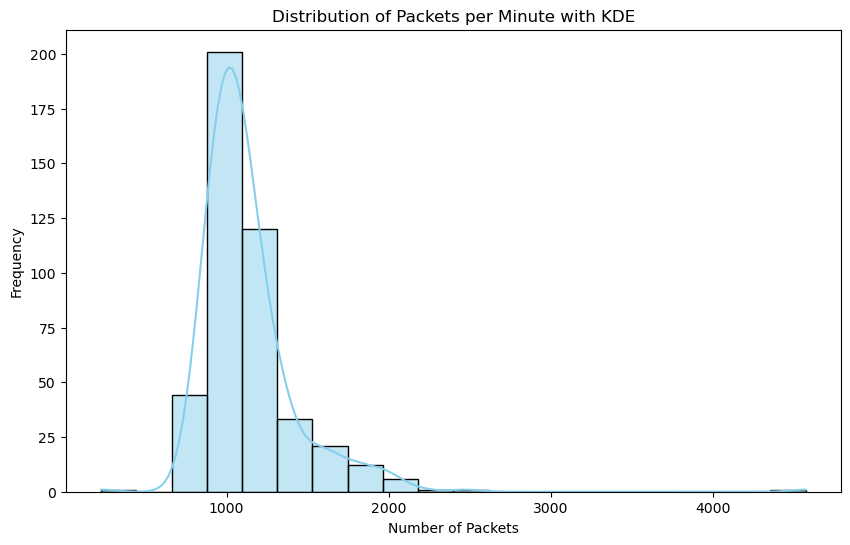

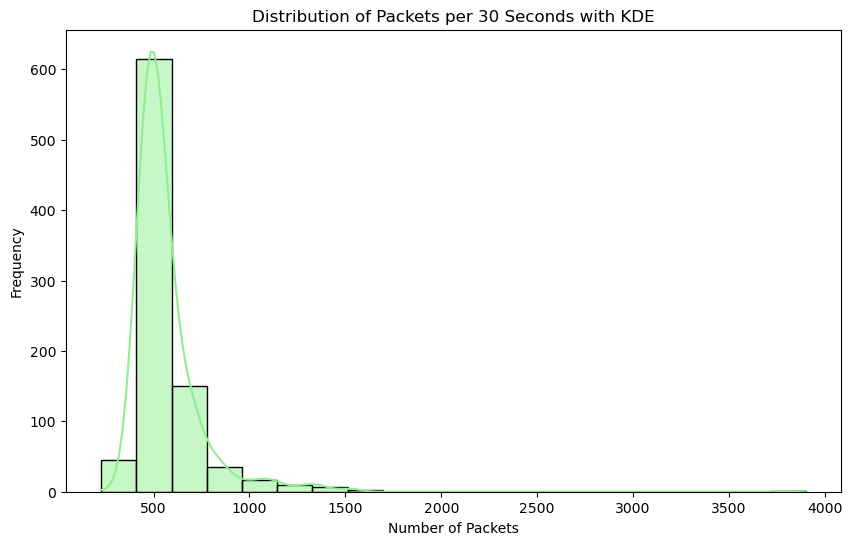

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Resample to count packets per minute
df_minute_counts = df_dark.resample('1min').size()  # Count packets per minute

# Step 2: Plot the histogram with KDE for 1-minute intervals
plt.figure(figsize=(10, 6))
sns.histplot(df_minute_counts, bins=20, kde=True, color='skyblue')
plt.title("Distribution of Packets per Minute with KDE")
plt.xlabel("Number of Packets")
plt.ylabel("Frequency")
plt.show()

# Step 3: Resample to 30-second intervals
df_30s_counts = df_dark.resample('30s').size()  # Count packets per 30 seconds

# Step 4: Plot the histogram with KDE for 30-second intervals
plt.figure(figsize=(10, 6))
sns.histplot(df_30s_counts, bins=20, kde=True, color='lightgreen')
plt.title("Distribution of Packets per 30 Seconds with KDE")
plt.xlabel("Number of Packets")
plt.ylabel("Frequency")
plt.show()


##### 2.2 Plot the number of packets per minute for the top 5 source IP address. Find the top 5 source IP addresses with the most sent packets, and make the following plots, indicating the total number of packets for each IP in the legend:
1. Repeat the previous line plot for each of the top 5 IP, specify the colors and labels.
2. Repeat the previous distribution plot for each of the top 5 IP, you can choose to plot in the same figure or in different figures.
3. Plot the ECDF of number of packets for each of the top 5 source IP address.
4. Answering the following questions:
    - Which kind of unique information can you derive from each plot that you cannot derive from others?
    - Can you observe some IP addresses with similar patterns? Can you observe such similarities in all plots, if you can, describe them?
    - Can you roughly observe the order of the total number of packets in the plots? Actually there're some minutes that have a lot of packets for the IP with the lowest amount of total packets (find them in the plots), why do you think such IP has less packets in the end? Can you observe the reason in the plots?

In [86]:
# Group by source IP and count the number of packets for each IP
top_ips = df_dark['src_ip'].value_counts().head(5).index  # Get the top 5 source IPs


In [87]:
# Dictionary to store resampled data for each IP
resampled_data = {}

for ip in top_ips:
    # Filter for the current IP and resample to get packets per minute
    ip_data = df_dark[df_dark['src_ip'] == ip].resample('1min').size()
    resampled_data[ip] = ip_data


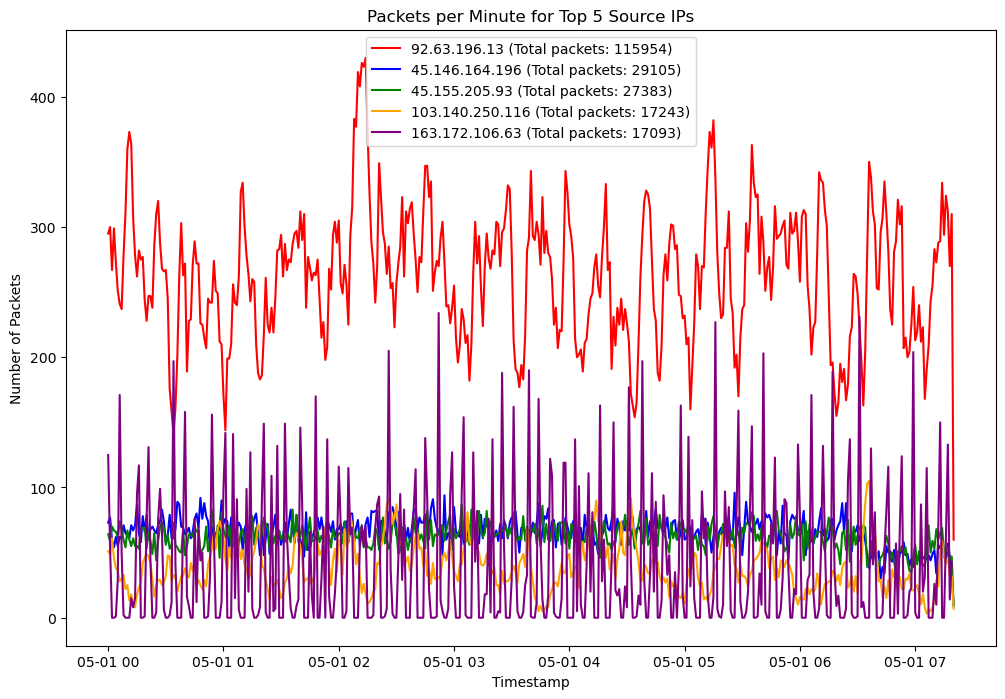

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, ip in enumerate(top_ips):
    plt.plot(resampled_data[ip], label=f"{ip} (Total packets: {resampled_data[ip].sum()})", color=colors[i])

plt.title("Packets per Minute for Top 5 Source IPs")
plt.xlabel("Timestamp")
plt.ylabel("Number of Packets")
plt.legend()
plt.show()


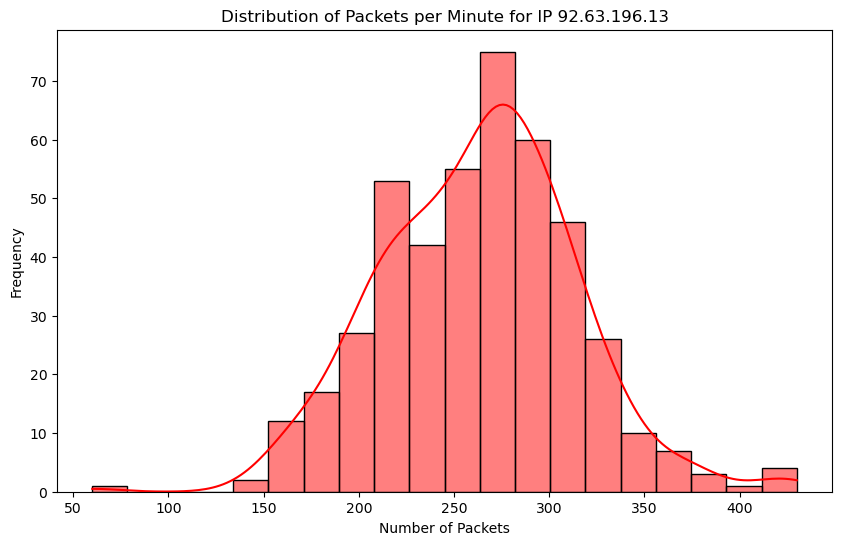

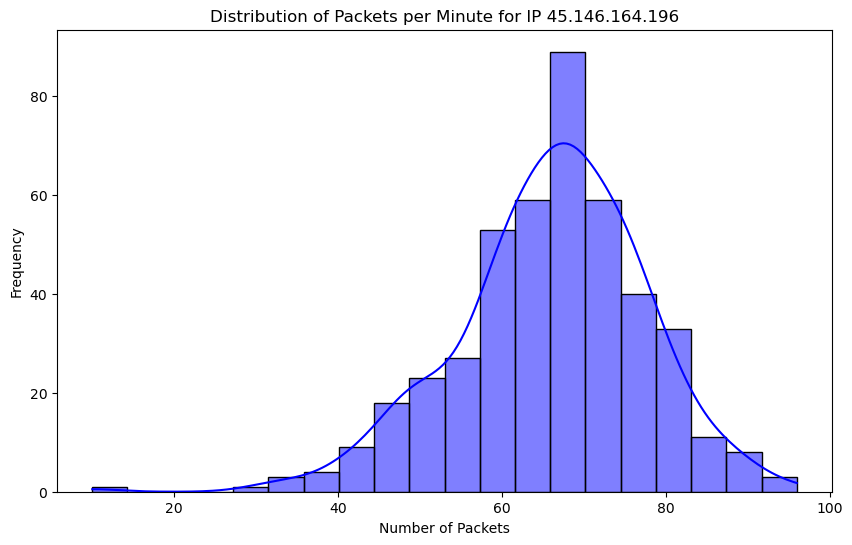

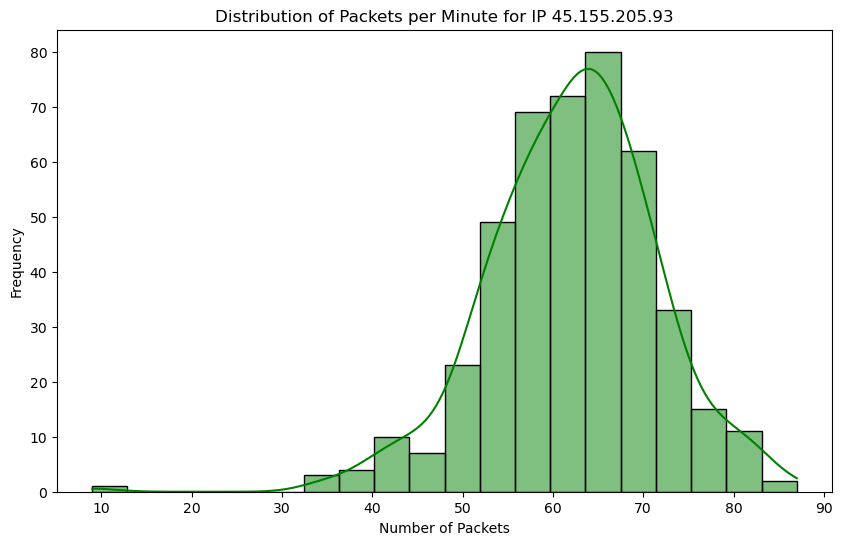

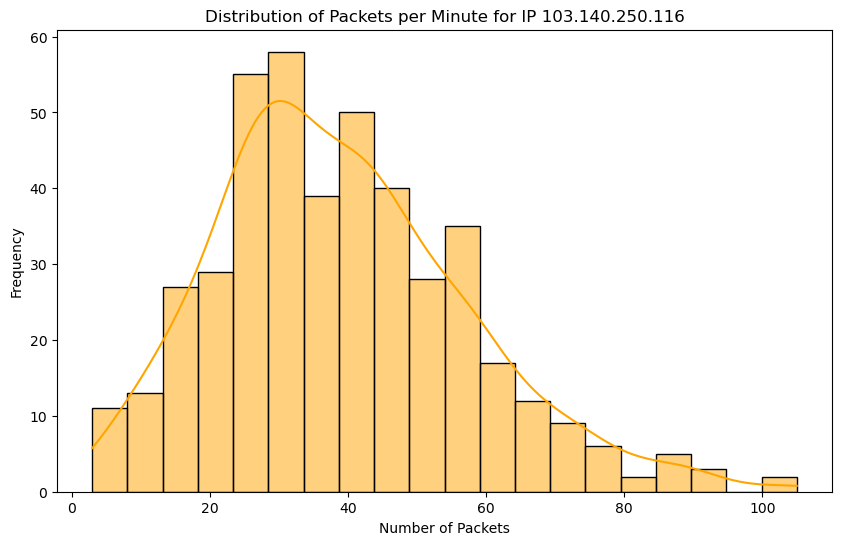

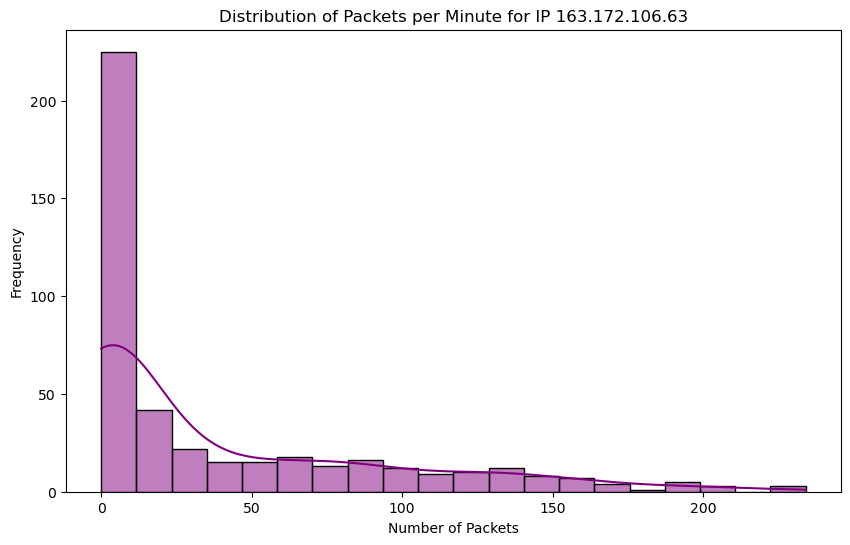

In [89]:
import seaborn as sns

for i, ip in enumerate(top_ips):
    plt.figure(figsize=(10, 6))
    sns.histplot(resampled_data[ip], bins=20, kde=True, color=colors[i])
    plt.title(f"Distribution of Packets per Minute for IP {ip}")
    plt.xlabel("Number of Packets")
    plt.ylabel("Frequency")
    plt.show()


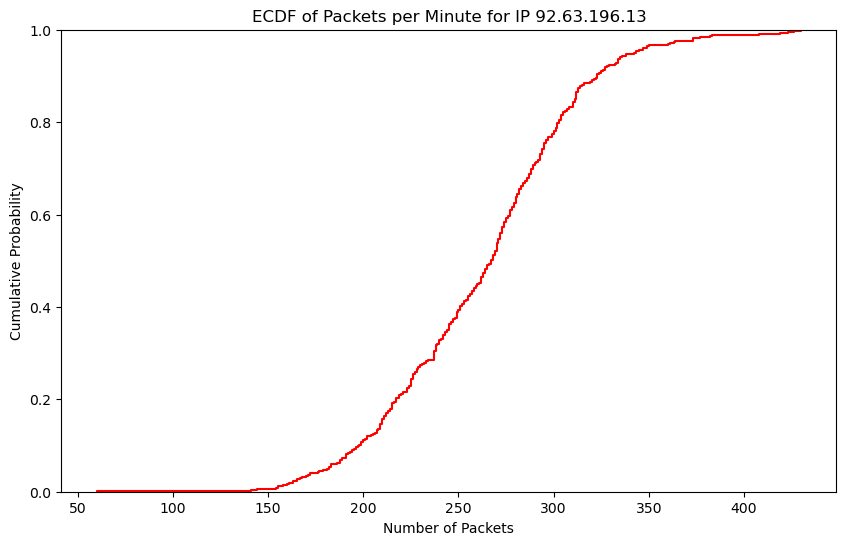

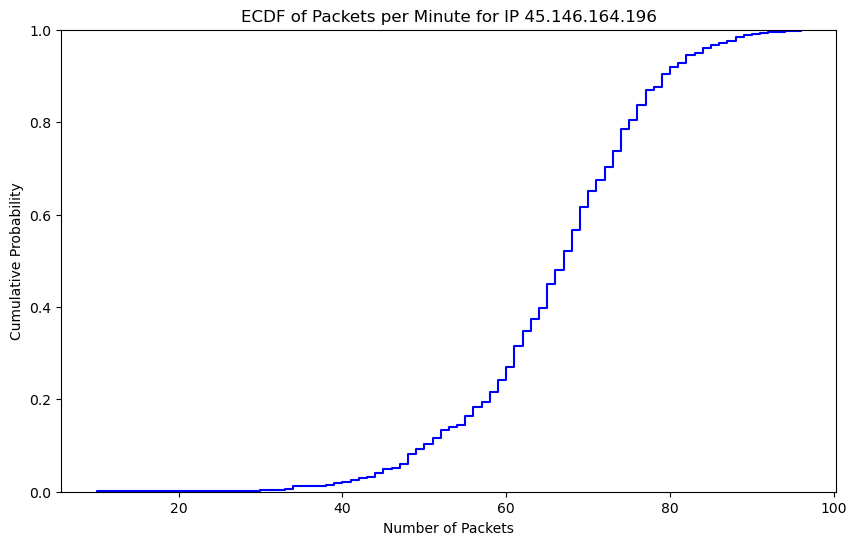

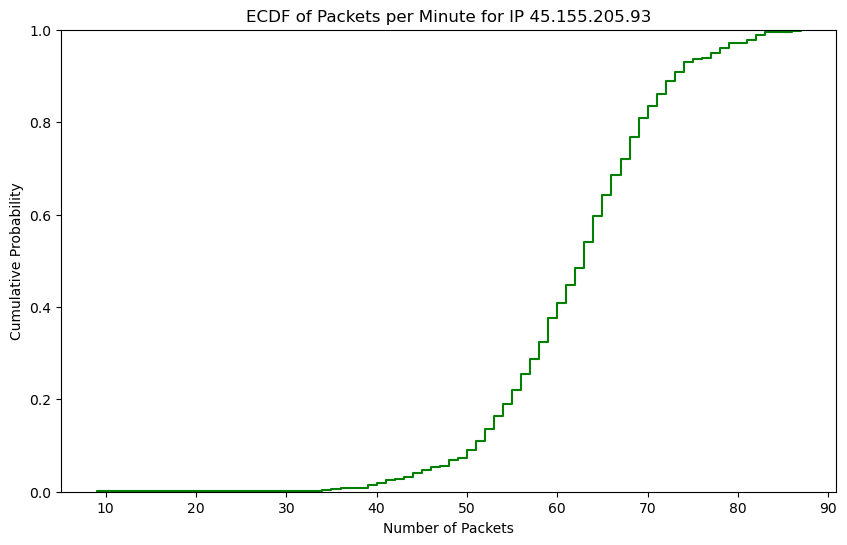

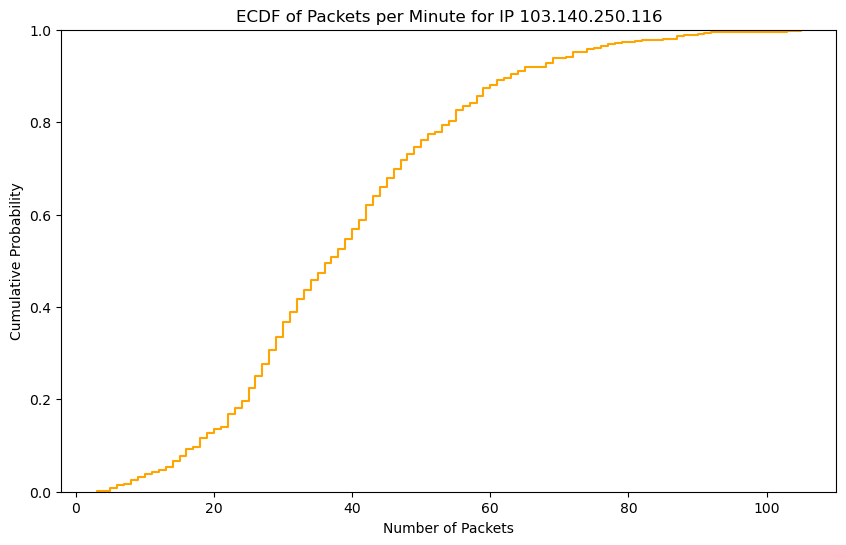

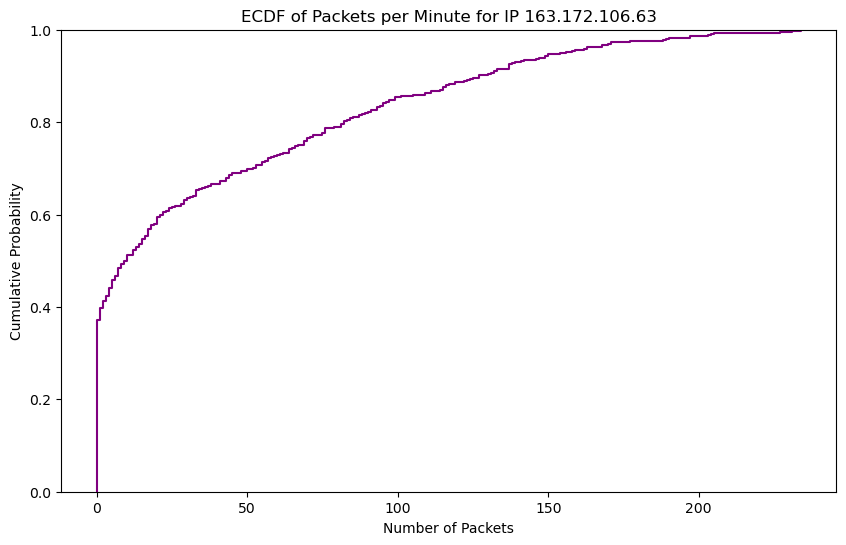

In [92]:
for i, ip in enumerate(top_ips):
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(resampled_data[ip], color=colors[i])
    plt.title(f"ECDF of Packets per Minute for IP {ip}")
    plt.xlabel("Number of Packets")
    plt.ylabel("Cumulative Probability")
    plt.show()


##### 2.3 Study the frequency of specific links
1. A link is defined as a specific and unique tuple composed of source IP, source port, destination IP, and destination port.
2. Find the number of packets belonging to each individual link.
3. Find the top 10 links with the most amount of packets.
4. Check the frequency of each link by computing the time elapsed between the recorded times (timestamps) of each pair of consecutive packets for a link. Such time span is called **intertime**, which can describe how frequent a link is sending packets, the lower the time, the higher the frequency. Specifically:
    1. Plot the time series of packets for the top 10 links, by making a scatter plot, in which x-axis is the timestamp and y-axis is from 1 to 10, each representing a link. The scatters that represent packets of a link are plot lying on a horizontal line following the timestamp. On top of that, for the label of y-axis, replace digit numbers with the corresponding link tuple (name) plus the number of packets. In this case, you don't need to calculate intertime.
    2. Make the boxplot of intertimes for each link in one single plot. The labels on x-axis should indicate the name of the link and the number of packets as what you have done in previous plot for y-axis. Change the scale of y-axis to logarithm scale. In this case, you need to calculate the intertimes for each link and remove value 0.
5. Answering the following questions:
    - Which plot is more suitable to derive the most frequent link?
    - Roughly, which link lasts the longest/shortest duration?
    - For which link can you observe the outliers in intertimes for both plots?
    - Which link has the most uniform intertimes?

In [93]:
# Define the link tuple and count the packets for each link
df_dark['link'] = list(zip(df_dark['src_ip'], df_dark['src_port'], df_dark['dst_ip'], df_dark['dst_port']))

# Group by the 'link' column and count the packets for each unique link
link_counts = df_dark.groupby('link').size().reset_index(name='packet_count')

# Find the top 10 links with the most packets
top_links = link_counts.nlargest(10, 'packet_count')
top_link_tuples = top_links['link'].values  # Extract the link tuples


In [94]:
# Filter the DataFrame for packets belonging to the top 10 links
top_links_df = df_dark[df_dark['link'].isin(top_link_tuples)]


In [95]:
import matplotlib.pyplot as plt

# Assign each link an integer y-coordinate (1 to 10)
link_y_map = {link: i+1 for i, link in enumerate(top_link_tuples)}

# Create the scatter plot for the top 10 links
plt.figure(figsize=(12, 8))

for link in top_link_tuples:
    link_data = top_links_df[top_links_df['link'] == link]
    y_val = link_y_map[link]
    plt.scatter(link_data['timestamp'], [y_val] * len(link_data), label=f"{link} ({link_counts.loc[link_counts['link'] == link, 'packet_count'].values[0]})", s=10)

# Labeling and aesthetics
plt.xlabel("Timestamp")
plt.ylabel("Link (with Packet Count)")
plt.yticks(list(link_y_map.values()), [f"{link} ({count})" for link, count in zip(top_links['link'], top_links['packet_count'])])
plt.title("Time Series of Packets for Top 10 Links")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjust legend position if necessary
plt.show()


KeyError: 'ts'

<Figure size 1200x800 with 0 Axes>